<a href="https://www.kaggle.com/code/radutoma74/hotel-reservation-dm-project?scriptVersionId=169975734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv


# **Homework 2:  Data pre-processing**

**Select one dataset**

The selected dataset is **[Hotel Reservations Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)**

In [2]:
#Reading dataset
df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")
df = pd.DataFrame(df)  # construct a dataframe
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## **1. Identify the types of attributes:  quantitative (continuous or discrete values), qualitative (ordinal or nominal)**

In [3]:
#showing information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

The analysis of the attributes of the data set results in the following classification:

**Quantitative Attributes:**

1. ***Continuous:***
    * lead_time: Number of days between the booking date and arrival date
    * avg_price_per_room: Average price per room
    
    
2. ***Discrete:***
    * no_of_adults: Number of adults for the booking 
    * no_of_children: Number of children for the booking 
    * no_of_weekend_nights: Number of weekend nights booked 
    * no_of_week_nights: Number of week nights booked 
    * required_car_parking_space: Whether a car parking space is required 
    * arrival_year: Year of arrival 
    * repeated_guest: Whether the guest is a repeat guest 
    * no_of_previous_cancellations: Number of previous cancellations 
    * no_of_previous_bookings_not_canceled: Number of previous bookings not canceled 
    * no_of_special_requests: Number of special requests made 

**Qualitative Attributes:**

1. ***Ordinal:***
    * arrival_month: Month of arrival
    * arrival_date: Date of arrival
    

2. ***Nominal:***
    * Booking_ID: Unique identifier for each booking 
    * type_of_meal_plan: Type of meal plan selected for the booking 
    * room_type_reserved: Type of room reserved 
    * market_segment_type: Market segment type 
    * booking_status: Status of the booking 
 
 
*Note:*

The *arrival_month* and *arrival_date* was classified as qualitative, ordinal because those have a natural ordering and seasonality (the hotel bookings may be influenced by the seasonality).

## 2. Select a quantitative attribute and apply (independently) the following transformations:

### a) Scaling (all values will be in [0,1])

In [4]:
# Scaling 'avg_price_per_room'
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
APPR = np.array(df["avg_price_per_room"])
scaler.fit(APPR.reshape(-1,1))
APPR_scaled=scaler.transform(APPR.reshape(-1,1))

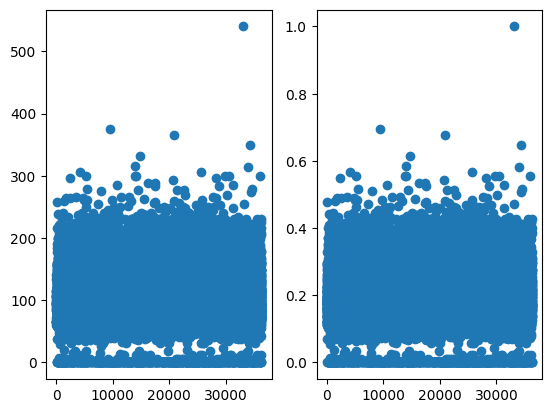

In [5]:
# analyze the distribution of original and scaled values
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
axs[0].scatter(range(len(APPR)),APPR)
axs[1].scatter(range(len(APPR_scaled)),APPR_scaled)

### b) Standardization (after the transformation the attribute will have value 0 and standard deviation 1)

In [6]:
# standardization of 'avg_price_per_room'
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
APPR = np.array(df["avg_price_per_room"])
scaler.fit(APPR.reshape(-1,1))
APPR_std=scaler.transform(APPR.reshape(-1,1))

In [7]:
# comparison between the means of the original values and the transformed ones
[np.mean(APPR),np.mean(APPR_std)]

[103.42353907649897, -7.051561264607473e-17]

In [8]:
# comparison between the standard deviations of the original values and the transformed ones
[np.std(APPR),np.std(APPR_std)]

[35.08894037453894, 1.0]

### c) Discretization (using 5 bins)

In [9]:
# discretization of the 'avg_price_per_room' attribute
from sklearn import preprocessing
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')
APPR = np.array(df["avg_price_per_room"])
APPR_discretized = discretizer.fit_transform(APPR.reshape(-1,1))

(array([2.1726e+04, 1.4267e+04, 2.7700e+02, 4.0000e+00, 1.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

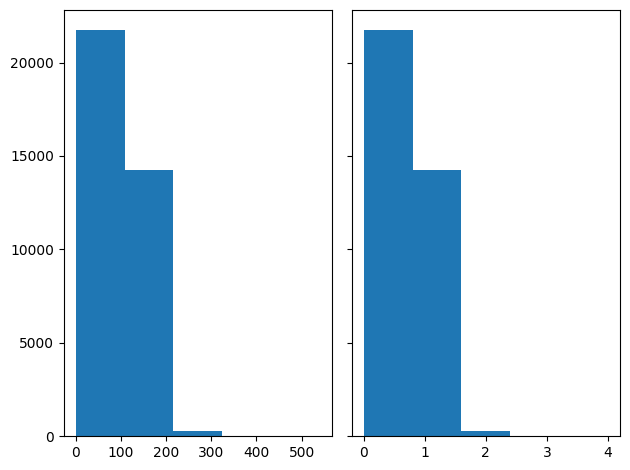

In [10]:
# analyze the distribution of original and discretized values
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(APPR, bins=5)
axs[1].hist(APPR_discretized, bins=5)

## 3. Identify an attribute with missing values (if there is none, remove at most 5% of the values of one attribute to create one) and apply an imputation technique

In [11]:
# Check if there are missing values
df.isna().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [12]:
import pandas as pd
import numpy as np
import random

df_na = df
# Calculate 5% of the total number of values
num_values_to_remove = int(0.05 * len(df_na))

# Randomly select indices to replace with NaN
indices_to_remove = random.sample(range(len(df_na)), num_values_to_remove)

# Replace the selected indices with NaN
df_na.loc[indices_to_remove, 'avg_price_per_room'] = np.nan

In [13]:
df_na.isna().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                       True
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [14]:
# Imputation of missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
APPR = np.array(df_na["avg_price_per_room"]).reshape(-1, 1)
imp.fit(APPR)  # construct the imputation model based on the strategy
dfImp = imp.transform(APPR) # apply the imputation model

In [15]:
dfImp

array([[ 65.  ],
       [106.68],
       [ 60.  ],
       ...,
       [ 98.39],
       [ 94.5 ],
       [161.67]])

## 4.  Sort the numerical attributes in a decreasing order based on their discriminative power

In [16]:
from sklearn.feature_selection import f_classif
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")
df = pd.DataFrame(df)  # construct a dataframe

# convert the booking_status from categorical to binary by encoding the categories with 0 and 1
df['booking_status_encoded'] = (df['booking_status'] == 'Canceled').astype(int)

# select only the numerical attributes
numerical_df = df.select_dtypes(include=[np.number])

X = numerical_df.drop('booking_status_encoded', axis=1)
y = numerical_df['booking_status_encoded']

f_values, _ = f_classif(X, y)
f_scores = pd.Series(f_values, index=X.columns).sort_values(ascending=False)

print(f_scores)

lead_time                               8636.863036
no_of_special_requests                  2482.040462
arrival_year                            1208.037136
avg_price_per_room                       752.582603
repeated_guest                           422.379313
no_of_week_nights                        316.434859
no_of_adults                             276.133767
required_car_parking_space               271.448581
no_of_weekend_nights                     137.995720
no_of_previous_bookings_not_canceled     131.842414
no_of_previous_cancellations              41.309877
no_of_children                            39.731293
arrival_month                              4.577559
arrival_date                               4.098465
dtype: float64
